In [1]:
import numpy as np
import pandas as pd

df=pd.DataFrame({'A':np.arange(5),
                 'B':np.arange(10,15)})


list(set([tuple(i) for i in pd.concat([df,df]).values]))
np.unique(pd.concat([df,df]).values,axis=0)
# df.T.to_json(),df.T.to_dict()


temp=df.values
# temp[[0,1,3],[0,1]]
temp[[0,3],[0,1]]#Simple indexin g works on the principle of broadcasting 
# For multiplication use ix_
temp[np.ix_([0,1,3],[0,1])]


' '.join(df['A'].astype(str))
df.apply(lambda s: ' '.join(map(str,s)),axis=1)

# list(map(str,df['A']))



0    0 10
1    1 11
2    2 12
3    3 13
4    4 14
dtype: object

In [3]:
np.arange(6).reshape(2,1,3)

array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [5]:
np.arange(6).reshape(-1,),np.arange(6).reshape(-1,1)

(array([0, 1, 2, 3, 4, 5]), array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]))

In [55]:
import datetime
t=pd.DataFrame({'A':np.arange(20),'B':np.arange(100,120)},index=pd.date_range(start=datetime.datetime.now()
                                              ,periods=20,freq='1s'))
t#Two stock prices N=20, D=2 and we hypothesise that AR(3) or MA(3) association is present


#So we will have to construct an array of shape N*D*T that will be 20*2*3
#As we can access individual feature as a column, we can engineer ~20*3 maps for each feature an then concatenate them about the feature axis

def create_shifts(s,sfts=3):
  s=s.ffill()#To avoid time leakage cannot look into the future
  l=s.shape[0]

  df_sfts=pd.concat(
      [s.shift(i).to_frame(s.name+'_'+str(i)) for i in range(sfts)],axis=1
  )
  df_sfts=df_sfts.iloc[sfts-1:]
  return df_sfts

def transform(s,sfts=5):
  for e,col in enumerate(s.columns):
    temp_col=create_shifts(s[col],sfts=sfts)
    n,t=temp_col.shape

    if e==0:
      final_array=temp_col.values.reshape(n,1,t)
    else:
      temp_col=temp_col.values.reshape(n,1,t)
      final_array=np.concatenate([final_array,
                                  temp_col],axis=1)#0--N,1-->d,2-->t
  return final_array






In [56]:
transform(t)#.shape

array([[[  4.,   3.,   2.,   1.,   0.],
        [104., 103., 102., 101., 100.]],

       [[  5.,   4.,   3.,   2.,   1.],
        [105., 104., 103., 102., 101.]],

       [[  6.,   5.,   4.,   3.,   2.],
        [106., 105., 104., 103., 102.]],

       [[  7.,   6.,   5.,   4.,   3.],
        [107., 106., 105., 104., 103.]],

       [[  8.,   7.,   6.,   5.,   4.],
        [108., 107., 106., 105., 104.]],

       [[  9.,   8.,   7.,   6.,   5.],
        [109., 108., 107., 106., 105.]],

       [[ 10.,   9.,   8.,   7.,   6.],
        [110., 109., 108., 107., 106.]],

       [[ 11.,  10.,   9.,   8.,   7.],
        [111., 110., 109., 108., 107.]],

       [[ 12.,  11.,  10.,   9.,   8.],
        [112., 111., 110., 109., 108.]],

       [[ 13.,  12.,  11.,  10.,   9.],
        [113., 112., 111., 110., 109.]],

       [[ 14.,  13.,  12.,  11.,  10.],
        [114., 113., 112., 111., 110.]],

       [[ 15.,  14.,  13.,  12.,  11.],
        [115., 114., 113., 112., 111.]],

       [[ 16.,  

# Perform Forecasting and simple prediction using AR model thar is linear Regression computed on previous lags of X values



In [144]:
add_noise=True

In [145]:
np.random.seed(seed=5)
x=np.sin(np.linspace(-2*3.14,3*3.14,500)) 
if add_noise:
  x+=np.random.normal(0,0.2,500)


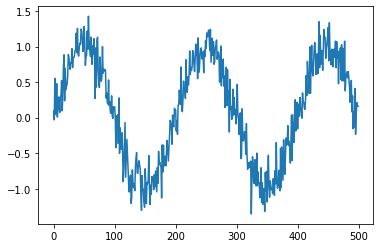

In [146]:
import matplotlib.pyplot as plt
plt.plot(x)

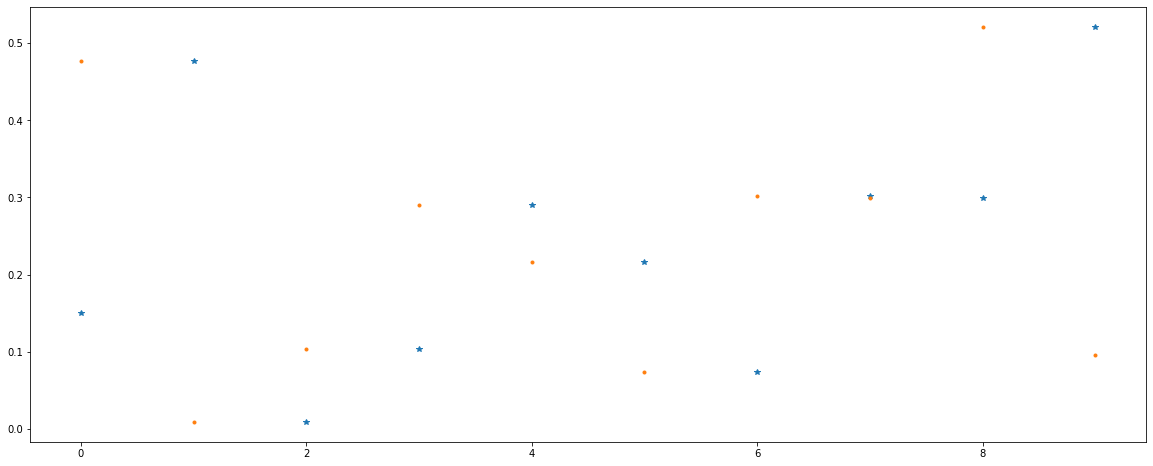

In [147]:
t=pd.DataFrame(x,index=pd.date_range(datetime.datetime.now().date(),periods=x.shape[0],freq='1d')
               ,columns=['V'])
ar=5
xx=transform(t,sfts=ar).reshape(-1,ar)

y=t.shift(-1).values[ar-1:].reshape(-1,)

y[-2:]

xx=xx[:-1]
y=y[:-1]

xx[-5:],y[-5:]
plt.figure(figsize=(20,8))
plt.plot(xx[:10,[0]].reshape(-1,1),'*')
plt.plot(y[:10],'.')#If you will observe last value of x lags y

In [148]:
from keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam


In [149]:
n_instances=t.shape[0]

In [150]:
i=Input(shape=(ar,))
x=Dense(units=1)(i)#Calling a caller of the obect of Dense unit 1 class

#This is formulation of Simple Linear Regression using dense layer with only one unit that linear combines all the features


model=Model(i,x)

model.compile(optimizer=Adam(lr=0.1),loss='mse')

splitter=int(n_instances//1.5)
model.fit(
    x=xx[:splitter],y=y[:splitter],
    epochs=30,
    validation_data=(xx[splitter:],y[splitter:])

)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
11/11 [==============================] - 0s 14ms/step - loss: 0.7871 - val_loss: 0.4902
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.2104 - val_loss: 0.1676
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.1020 - val_loss: 0.0986
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0735 - val_loss: 0.0831
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0641 - val_loss: 0.0670
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0573 - val_loss: 0.0619
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0550 - val_loss: 0.0609
Epoch 8/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0517 - val_loss: 0.0557
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.0566
Epoch 10/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0545
Epoch 11/30
11/11 

# Forecast using AR model

The first code block tries to perform simple prediction where we directly use to predict the values using the all the observed value savailaible 

like yT+5|T+4 and not YT+5|T



In [151]:
#It is a AR 5 model so will need last five values from the training set to predict the first test value


test_set=t[splitter-ar:]
x_test=transform(test_set,sfts=ar).reshape(-1,5)#.shape#Last set of predictors cannot be validated as we dont have the T+1 data
x_test=x_test[:-1,:]
# x_test.shape

y_test=t[splitter:].values#.shape #(t,t-1,t-2,t-3,t-4 for predicting t+1)

0.05049004091067508

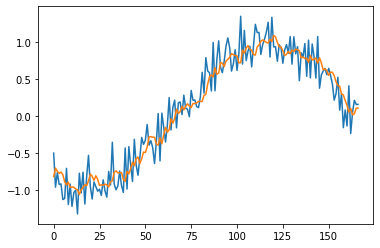

In [152]:
y_pred_t_1_t=model.predict(x_test)

from sklearn.metrics import mean_squared_error as mse

plt.plot(y_test)
plt.plot(y_pred_t_1_t)
mse(y_test,y_pred_t_1_t)

In [153]:
#Lets forecast 50 points from given instance
# Ytill T+50|T


# We have a AR 5 model so as usual we will require 5 history points to predict the upcoming point
# x_test[0] will serve as our starting set of redictors
# Gradually we will need to make use of our estimate for calculating the next prediction so we will use a first in first out approach for this or que

# or we can just append and remove from different ends of the list to create a FIFO

num_of_forecasts=50
y_pred_t_50_t=[]

for i in range(num_of_forecasts):
  if i==0:
    temp_x=x_test[0:1,:]
    
  y_pred=model.predict(temp_x)
  y_pred_t_50_t.append(y_pred[0])

  #Perform LIFO on x
  temp_x=np.concatenate([temp_x[:,1:],y_pred],axis=1)






0.17686663840415837

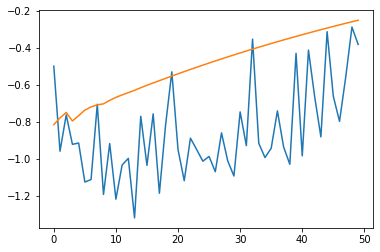

In [154]:
plt.plot(y_test[:num_of_forecasts])
plt.plot(y_pred_t_50_t)
mse(y_test[:num_of_forecasts],y_pred_t_50_t)

In [158]:
# If we add further noise to the data The AR model fails to capture unrealizable error part and the forecast values deviate more
# Therefore we will have to devise methods statistical models that are able to forecast till high order of time values

# ARIMA is one of the Statistical model that incorporates both correlation of values at lag and error values of the historical data
# Thus a difference based ARIMA model with stationry primary variable can be employed for forecating as we will have more confience on the beta estimate coefficients




# Rough Work

In [156]:
test_set[:6],transform(test_set,sfts=ar)[:2,...]

(                   V
 2022-11-25 -0.918367
 2022-11-26 -0.926347
 2022-11-27 -0.591764
 2022-11-28 -0.887015
 2022-11-29 -0.960287
 2022-11-30 -0.499034,
 array([[[-0.96028705, -0.8870151 , -0.59176449, -0.92634718,
          -0.91836685]],
 
        [[-0.49903423, -0.96028705, -0.8870151 , -0.59176449,
          -0.92634718]]]))

In [157]:
test_set[-6:],transform(test_set,sfts=ar)[-2:,...]

(                   V
 2023-05-10  0.410292
 2023-05-11 -0.234291
 2023-05-12  0.051083
 2023-05-13  0.213341
 2023-05-14  0.158010
 2023-05-15  0.159415,
 array([[[ 0.15800981,  0.21334071,  0.051083  , -0.23429137,
           0.41029187]],
 
        [[ 0.15941488,  0.15800981,  0.21334071,  0.051083  ,
          -0.23429137]]]))